In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
 dataset = pd.read_csv("HousingData.csv")

In [3]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Preparing The Dataset

In [4]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
dataset.isnull().sum() / dataset.shape[0]*100

CRIM       3.952569
ZN         3.952569
INDUS      3.952569
CHAS       3.952569
NOX        0.000000
RM         0.000000
AGE        3.952569
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      3.952569
MEDV       0.000000
dtype: float64

In [7]:
(dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1]))*100

1.693958215697346

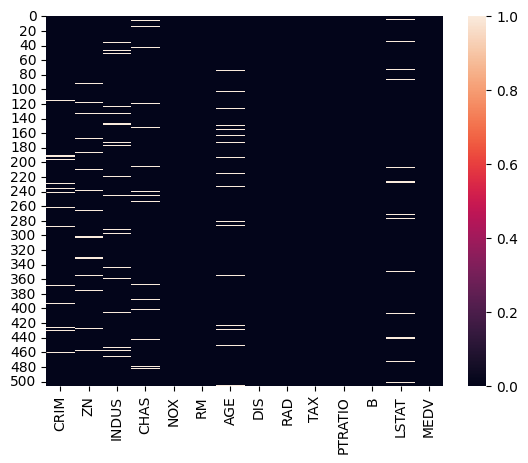

In [8]:
sns.heatmap(dataset.isnull())
plt.show()

<Axes: xlabel='CRIM', ylabel='Density'>

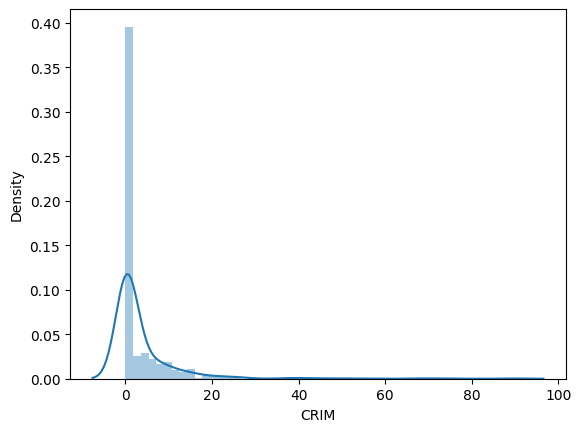

In [9]:
 sns.distplot(dataset["CRIM"])

<Axes: xlabel='ZN', ylabel='Density'>

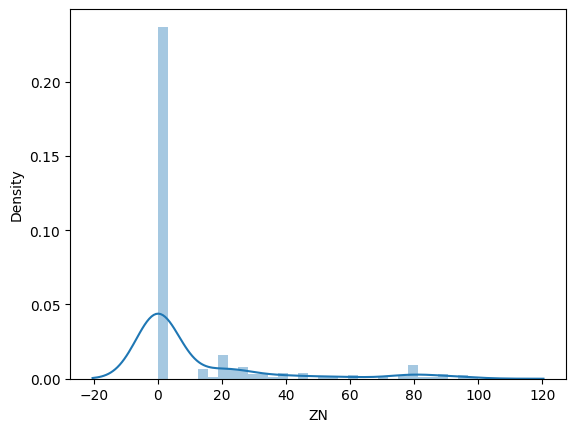

In [10]:
 sns.distplot(dataset["ZN"])

<Axes: xlabel='INDUS', ylabel='Density'>

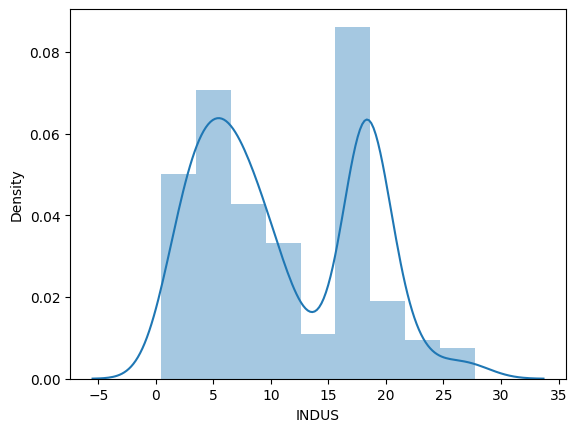

In [11]:
 sns.distplot(dataset["INDUS"])

<Axes: xlabel='AGE', ylabel='Density'>

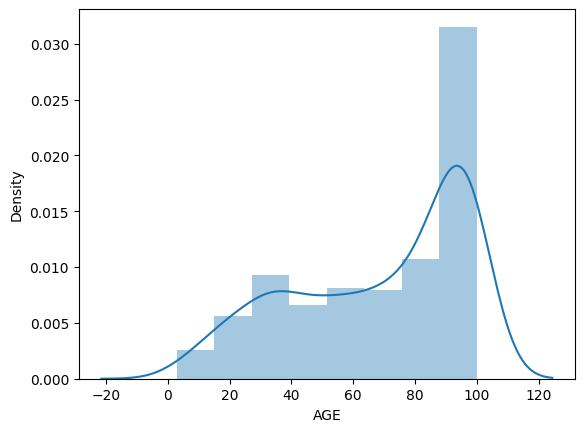

In [12]:
 sns.distplot(dataset["AGE"])

In [13]:
dataset["CHAS"].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

<Axes: xlabel='LSTAT', ylabel='Density'>

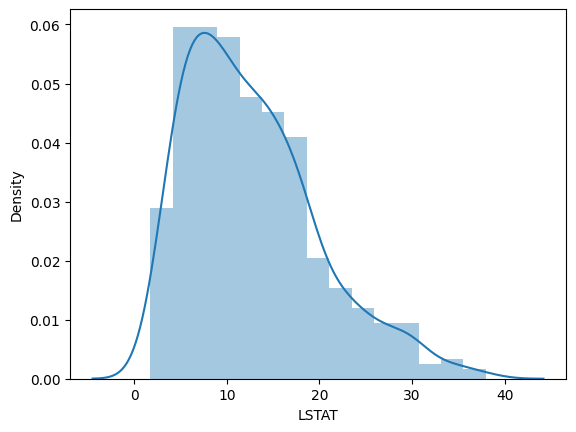

In [14]:
  sns.distplot(dataset["LSTAT"])

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assume your dataset is loaded into a variable called 'dataset'

# 1. Columns that need median imputation
median_cols = ["CRIM", "ZN", "INDUS", "AGE"]
median_imputer = SimpleImputer(strategy="median")
dataset[median_cols] = median_imputer.fit_transform(dataset[median_cols])

# 2. Column that needs mean imputation
mean_cols = ["LSTAT"]
mean_imputer = SimpleImputer(strategy="mean")
dataset[mean_cols] = mean_imputer.fit_transform(dataset[mean_cols])

# 3. Column that needs mode (most frequent) imputation
mode_cols = ["CHAS"]
mode_imputer = SimpleImputer(strategy="most_frequent")
dataset[mode_cols] = mode_imputer.fit_transform(dataset[mode_cols])

# Optional: Verify all missing values are filled
print(dataset.isnull().sum().sum())


0


In [16]:
 dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.479140,10.768775,11.028893,0.067194,0.554695,6.284634,68.845850,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.570832,23.025124,6.704679,0.250605,0.115878,0.702617,27.486962,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,2.808720,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 ### Exploratory data analysis

In [17]:
 dataset.corr()*100

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,100.000000,-18.535859,39.263224,-5.558479,41.097051,-22.004496,34.342714,-36.602542,60.122387,56.046910,27.796397,-36.533602,43.786556,-38.389516
ZN,-18.535859,100.000000,-50.730428,-3.299239,-49.861913,31.229544,-53.534131,63.242791,-30.006056,-30.438470,-39.462242,17.012525,-40.091194,36.229247
INDUS,39.263224,-50.730428,100.000000,5.469284,73.838652,-37.797842,61.424805,-69.862070,59.273529,71.626666,38.536624,-35.483999,56.406204,-47.639442
CHAS,-5.558479,-3.299239,5.469284,100.000000,7.086746,10.679742,7.498396,-9.231841,-0.333939,-3.582225,-10.945150,5.060757,-4.780759,18.384444
NOX,41.097051,-49.861913,73.838652,7.086746,100.000000,-30.218819,71.186411,-76.923011,61.144056,66.802320,18.893268,-38.005064,57.237922,-42.732077
RM,-22.004496,31.229544,-37.797842,10.679742,-30.218819,100.000000,-23.951790,20.524621,-20.984667,-29.204783,-35.550149,12.806864,-60.296205,69.535995
AGE,34.342714,-53.534131,61.424805,7.498396,71.186411,-23.951790,100.000000,-72.435354,44.708784,49.840844,26.182556,-26.802947,57.322582,-37.757210
DIS,-36.602542,63.242791,-69.862070,-9.231841,-76.923011,20.524621,-72.435354,100.000000,-49.458793,-53.443158,-23.247054,29.151167,-48.342926,24.992873
RAD,60.122387,-30.006056,59.273529,-0.333939,61.144056,-20.984667,44.708784,-49.458793,100.000000,91.022819,46.474118,-44.441282,46.843967,-38.162623
TAX,56.046910,-30.438470,71.626666,-3.582225,66.802320,-29.204783,49.840844,-53.443158,91.022819,100.000000,46.085304,-44.180801,52.454474,-46.853593


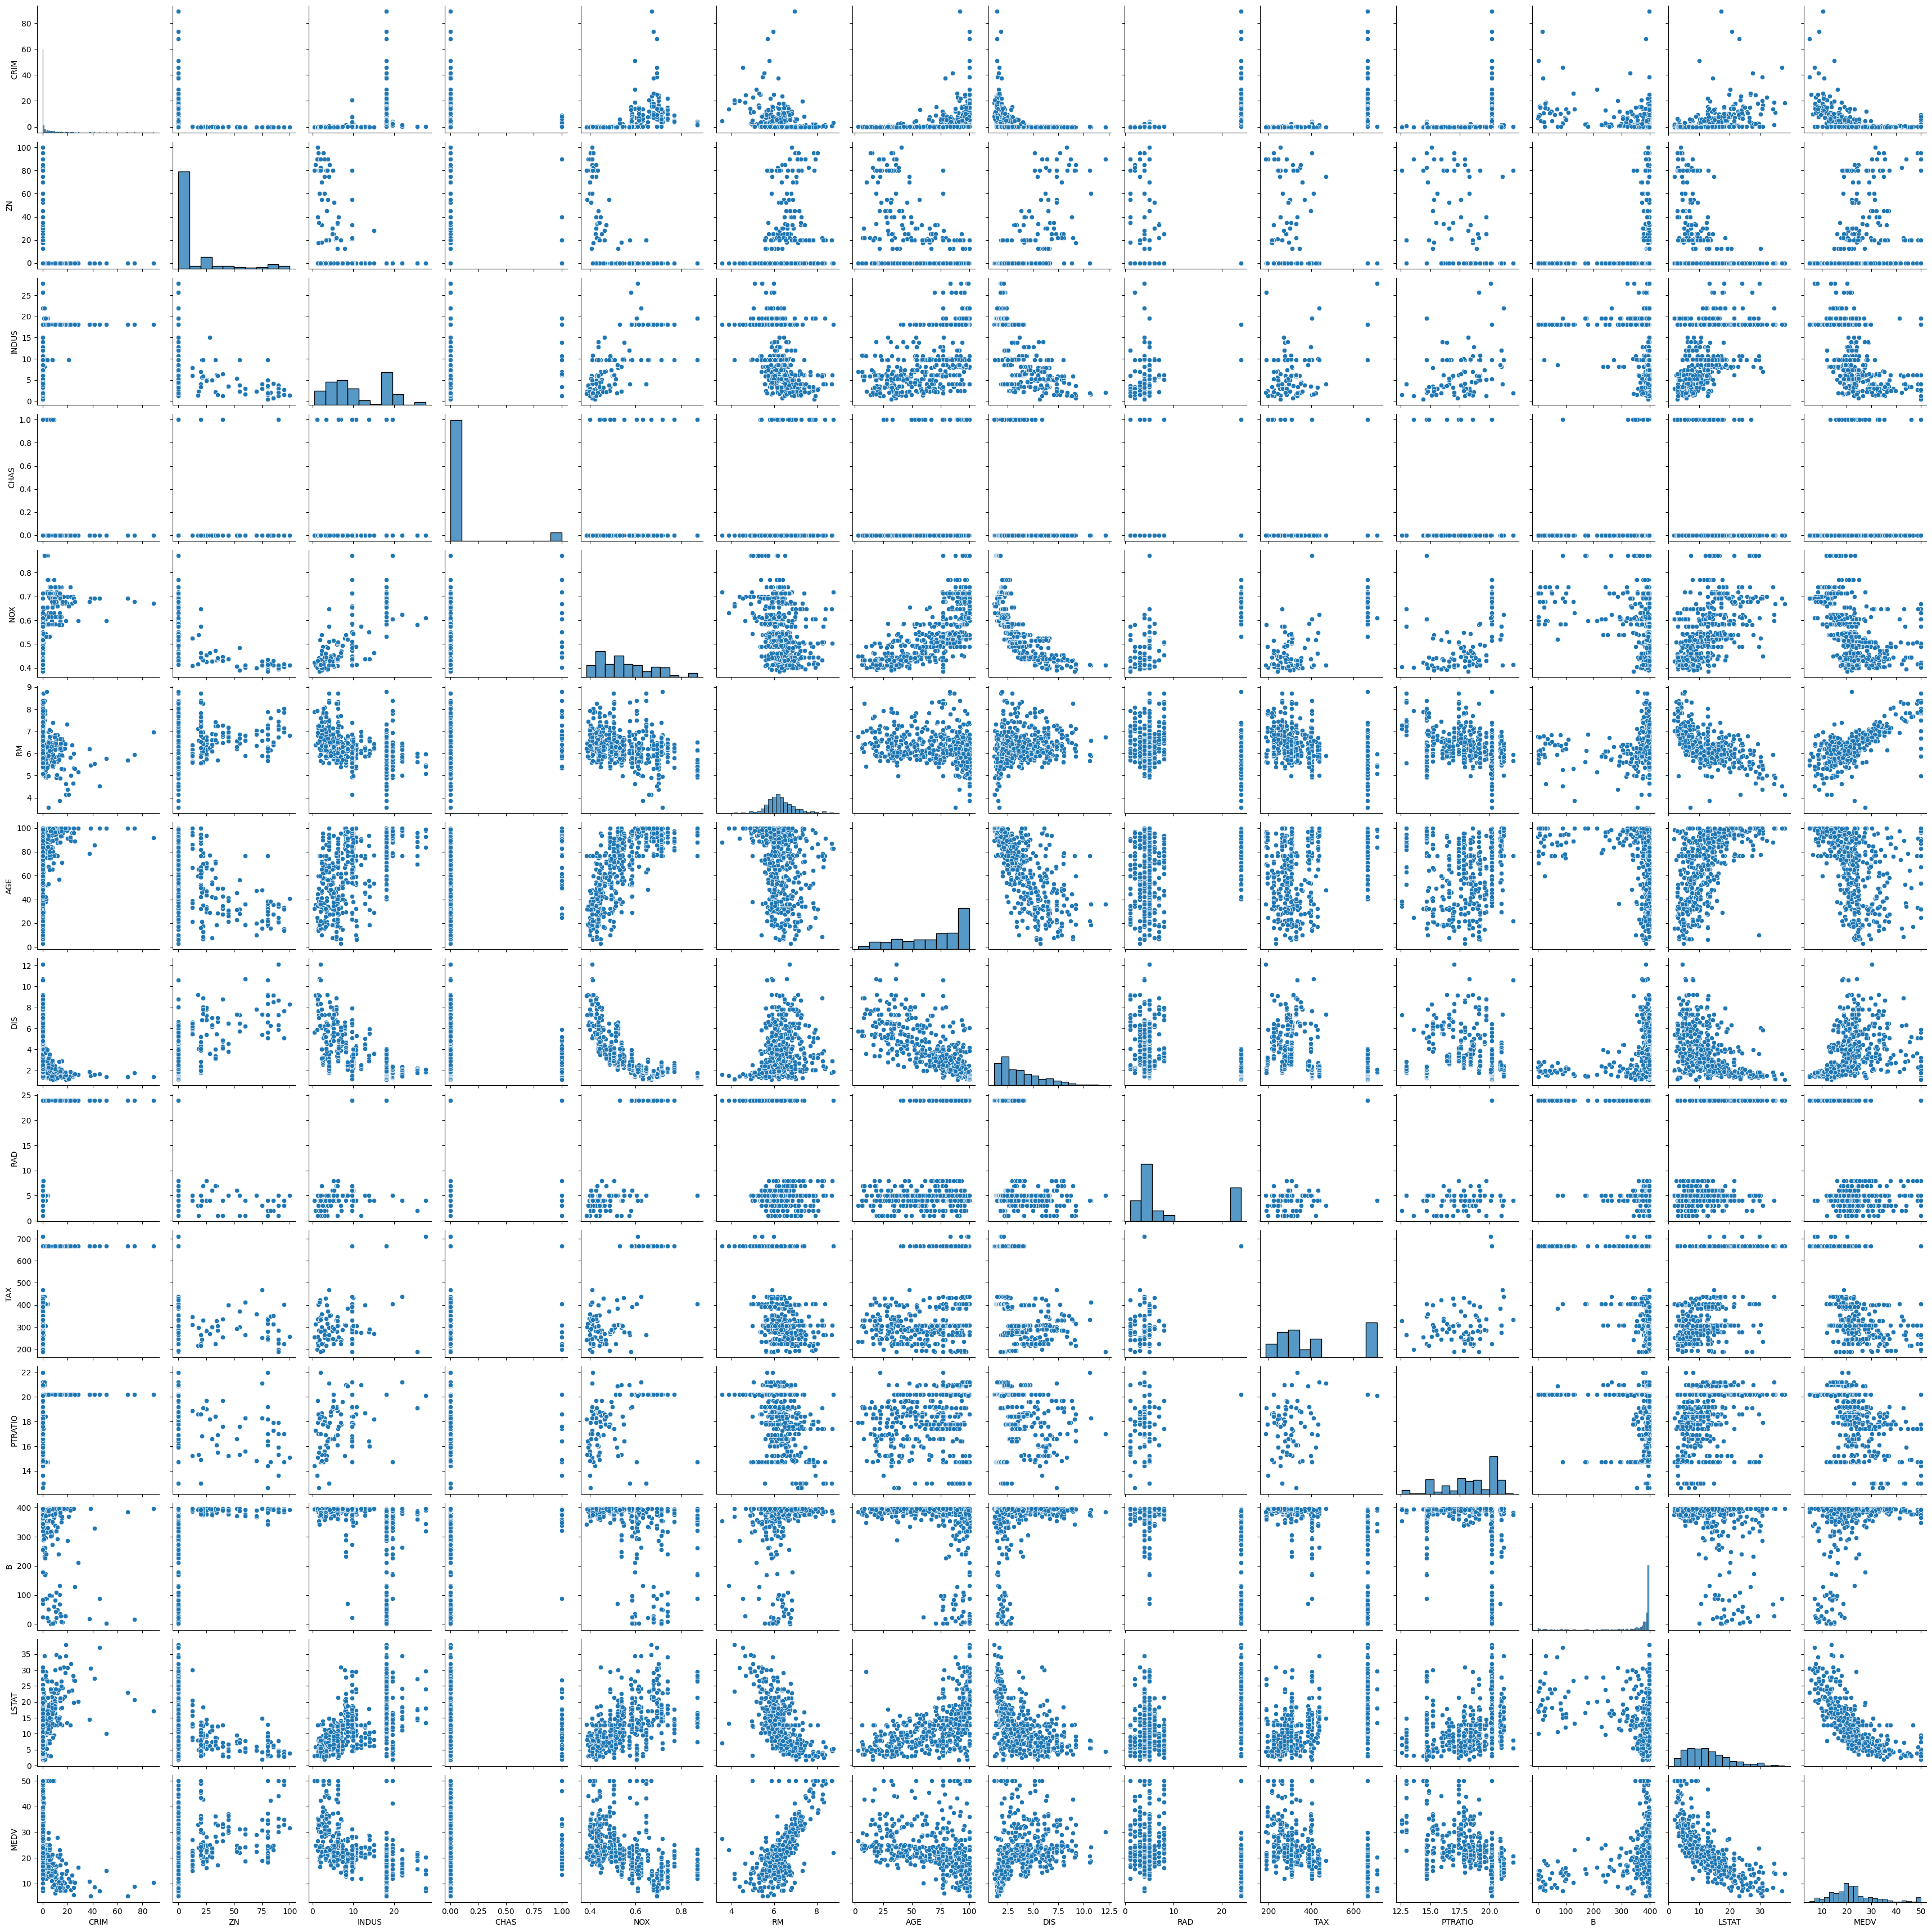

In [18]:
 sns.pairplot(data=dataset)

<Axes: xlabel='Crime Rate', ylabel='House Price'>

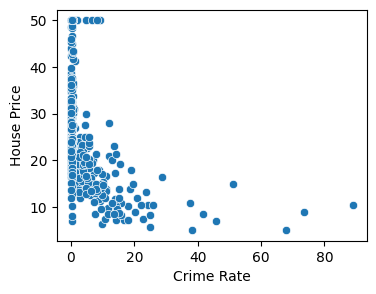

In [19]:
plt.figure(figsize=(4,3))
plt.xlabel("Crime Rate")
plt.ylabel("House Price")
# plt.title("Relation between crime rate and Price")
sns.scatterplot(x=dataset["CRIM"],y=dataset["MEDV"])


<Axes: xlabel='LSTAT', ylabel='MEDV'>

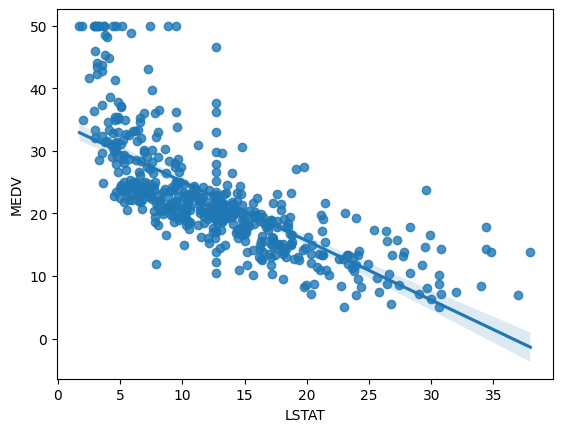

In [20]:
sns.regplot(x="LSTAT",y="MEDV",data=dataset)

<Axes: xlabel='RM', ylabel='MEDV'>

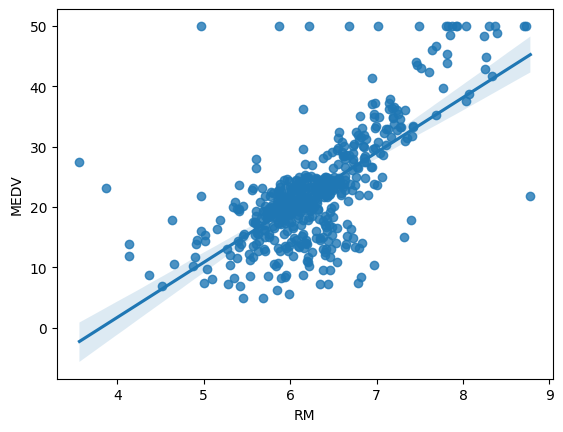

In [21]:
sns.regplot(x="RM",y="MEDV",data=dataset)

<Axes: xlabel='CHAS', ylabel='MEDV'>

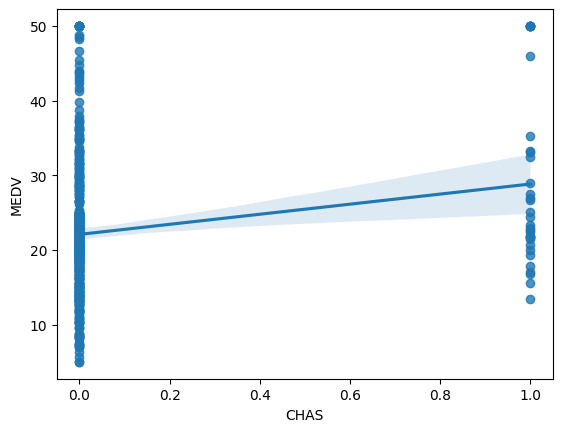

In [22]:
sns.regplot(x="CHAS",y="MEDV",data=dataset)

In [23]:
x = dataset.iloc[:,:-1]
y = dataset["MEDV"]

In [24]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.480000


In [25]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
x_train.shape,x_test.shape

((404, 13), (102, 13))

In [29]:
y_train.shape , y_test.shape

((404,), (102,))

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [31]:
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [32]:
x_test,x_train

(array([[-0.47005731, -0.42515424, -0.32305316, ..., -1.33894103,
          0.41308415, -0.64178796],
        [-0.47481355,  1.31644143, -0.81806399, ..., -0.78082095,
          0.42860582, -1.41479353],
        [-0.46817849, -0.42515424,  2.40101559, ...,  0.61447927,
          0.3533257 ,  0.62504332],
        ...,
        [ 1.4086093 , -0.42515424,  0.94616669, ...,  0.67029128,
         -3.58319267,  1.06696121],
        [-0.47542726, -0.42515424, -1.10782643, ..., -0.27851287,
          0.41851673, -0.10587483],
        [-0.46960779, -0.42515424,  0.15082916, ..., -0.16688885,
          0.27704776, -0.6558171 ]]),
 array([[ 1.31113389, -0.47914112,  1.08544651, ...,  0.84534281,
         -0.07433689,  1.78567409],
        [-0.32013052, -0.47914112, -0.40091153, ...,  1.20474139,
          0.4301838 , -0.57766635],
        [-0.38729492, -0.47914112, -0.71131561, ..., -0.63717631,
          0.06529747, -0.66966987],
        ...,
        [-0.38952153,  2.99847869, -1.31570819, ..., -

In [33]:
x_train[0]

array([ 1.31113389, -0.47914112,  1.08544651, -0.27288841,  0.48925206,
       -1.42806858,  1.04842183, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.78567409])

internally we use gradit decent and our main aim is to come to the global minima and to come to the global media we have to make sure that all our indipendentfeature unit should be in the same scale vecause of that the convergence will happen quickly

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.coef_

array([-0.99168828,  0.63680317, -0.1843942 ,  0.83366225, -1.87786207,
        3.36112388, -0.5059371 , -3.20310001,  1.86943915, -1.49220565,
       -1.97540835,  1.1130453 , -3.0650132 ])

In [37]:
lr.intercept_

22.796534653465347

In [38]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [39]:
lr.predict(x_test)

array([31.48992404, 39.00542497, 16.39218201, 26.68128131, 19.76421615,
       25.05679249, 19.8328328 , 16.2040187 , 23.57149669, 22.65291121,
       27.74601305, 20.89921424, -5.51037508, 23.65616904, 20.49859064,
       27.02069888, 21.43151154,  6.75475927, 44.0897108 , 18.45101648,
       26.68813944, 32.39512219, 13.06364471, 24.5437321 , 18.53755904,
       16.24452314, 22.91520236, 15.83188142, 24.9797828 , 21.09257041,
       24.80370442, 26.87599569, 27.09272017, 17.54038641, 17.86951072,
       18.95725844, 33.4034414 , 21.49339212, 26.50328333, 24.34855713,
       16.11616922, 34.45879218, 46.12992418, 19.17849104, 29.85868029,
       17.56630592, 15.50746454, 27.8897981 , 21.15536469, 32.80194786,
       23.34323147, 36.46718212, 17.80774376, 28.07057412, 43.15507715,
       23.32771266, 19.67867083, 34.5890929 , 27.3431825 , 14.19058771,
       24.21935001, 32.61390947, 33.91530071, 17.34599316, 21.92440059,
       19.21422822, 21.56519998, 27.88805152, 32.79939053, 12.54

<Axes: xlabel='MEDV'>

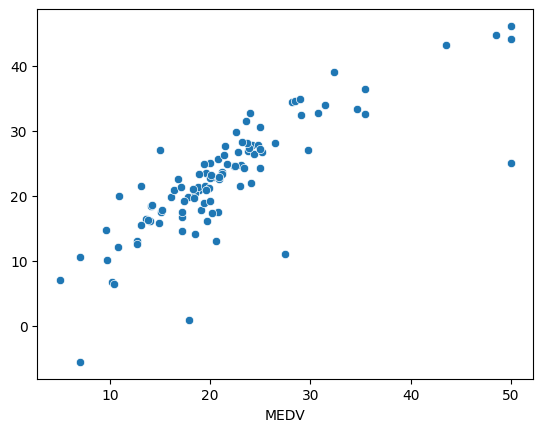

In [40]:
sns.scatterplot(x=y_test,y=lr.predict(x_test))

In [41]:
error = y_test-lr.predict(x_test)
error

173    -7.889924
274    -6.605425
491    -2.792182
72     -3.881281
452    -3.664216
         ...    
412    17.037404
436    -5.094216
411    -0.395983
86     -2.151585
75     -4.924018
Name: MEDV, Length: 102, dtype: float64

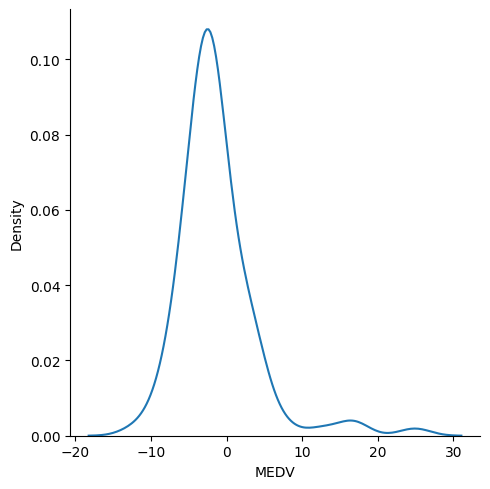

In [42]:
sns.displot(error,kind="kde")

<Axes: ylabel='MEDV'>

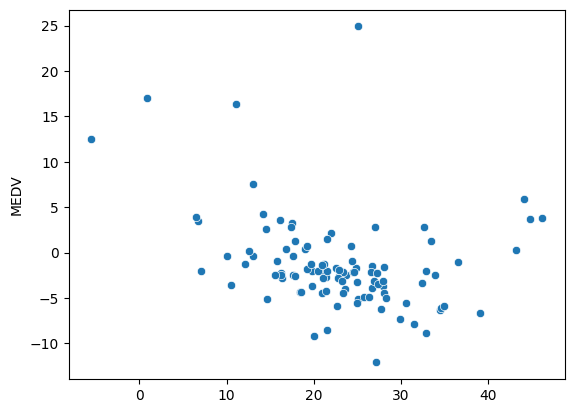

In [43]:
sns.scatterplot(y=error,x=lr.predict(x_test))

In [44]:
lr.score(x_test,y_test)*100

61.50742065811923

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_squared_error(y_test,lr.predict(x_test))

28.22806466739012

In [47]:
np.sqrt(28.22806466739013)

5.313009003134677

In [48]:
mean_absolute_error(y_test,lr.predict(x_test))

3.8682182148146307

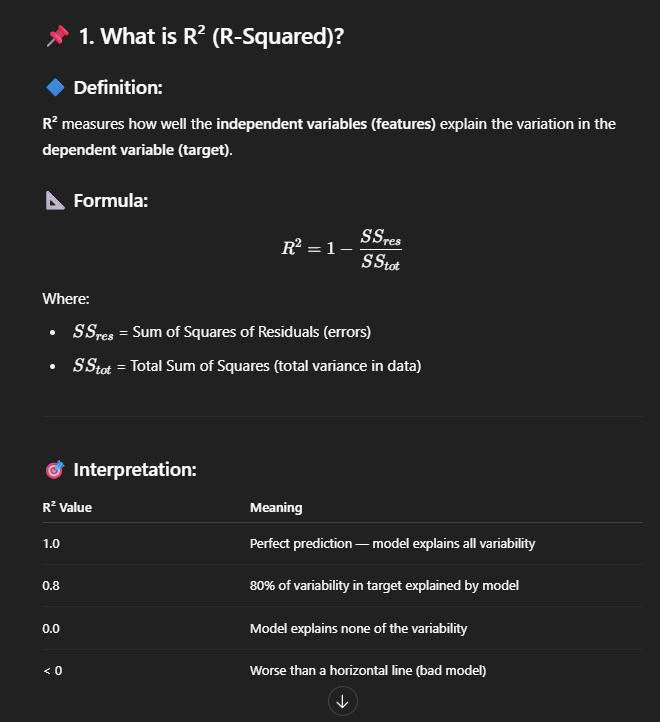

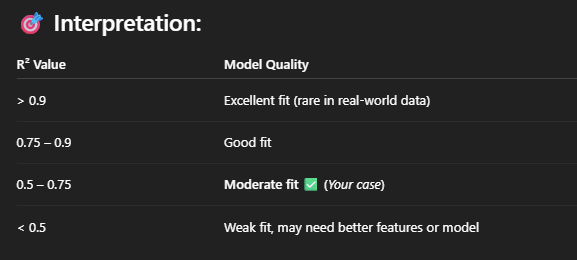

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test,lr.predict(x_test))
score*100

61.50742065811923

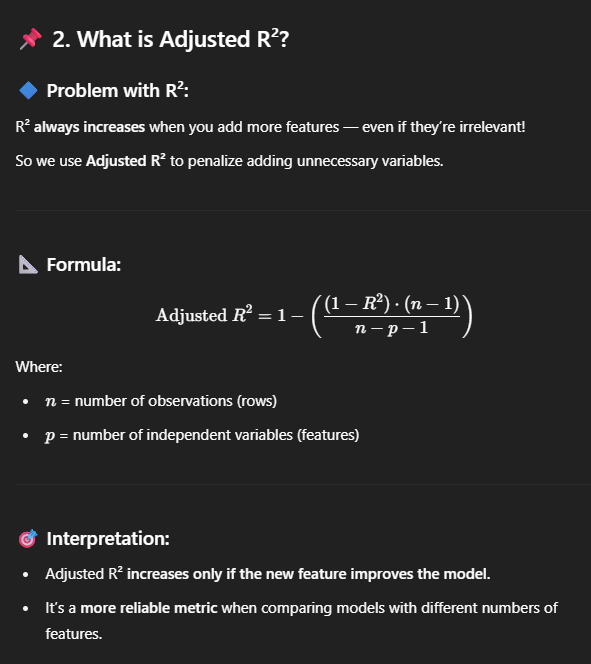

In [50]:
n = len(y_test)
p = x.shape[1]
r2 = score
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
adjusted_r2*100

55.82101689170502

In [51]:
 sample_input = [[0.1, 25.0, 5.0, 0, 0.45, 6.2, 45.0, 4.5, 4, 300.0, 17.0, 390.5, 9.5]]
sample_input = pd.DataFrame(sample_input, columns=x.columns)

ss.transform(sample_input)

array([[-0.46895101,  0.66334305, -1.03085828, -0.25      , -0.90321141,
         0.05929283, -0.87002506,  0.37836132, -0.69253237, -0.70724199,
        -1.115693  ,  0.3576496 , -0.57725392]])

In [52]:
lr.predict(sample_input)


array([-47.73102933])

In [53]:
lr.predict([ [1.31113389, -0.47914112,  1.08544651, -0.27288841,  0.48925206,
       -1.42806858,  1.04842183, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.78567409]])

array([10.69370324])

In [54]:
import pickle as p
p.dump(lr,open("lr_model.pkl","wb"))

In [57]:
import pickle as p
p.dump(ss,open("scaling.pkl","wb"))

In [55]:
pkl_lr = p.load(open("lr_model.pkl","rb"))
pkl_lr.predict(sample_input)

array([-47.73102933])

In [56]:
 pkl_lr.predict([ [1.31113389, -0.47914112,  1.08544651, -0.27288841,  0.48925206,
       -1.42806858,  1.04842183, -0.80217296,  1.70689143,  1.57843444,
        0.84534281, -0.07433689,  1.78567409]])

array([10.69370324])